# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


In [3]:
import pandas as pd

In [4]:
import openpyxl

In [28]:
import numpy as np

In [96]:
import datetime

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [11]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",nrows=30000)

In [8]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [12]:
df.shape

(30000, 15)

In [10]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
# All the current active pet licensing data (name, breed, owner address) for New York City as of April 28, 2016

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
# What is the most popular breed in your NYC zip code?
# Where is the highest concentration of dogs in NYC?
# What is NYC's favorite dog colors?
# How many dogs in NYC are trained?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [22]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [26]:
df.dropna(subset=['Primary Breed']).shape

(30000, 15)

In [35]:
df['Primary Breed'] = df['Primary Breed'].replace('Unknown', np.nan)

In [36]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05


In [37]:
df.dropna(subset=['Primary Breed'])

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10019,Cece,F,Lhasa Apso,NaN,WHITE,NaN,NaN,2008-01-01,Yes,No,Yes,2015-08-22 18:49:52.060,2015-08-22,2020-09-24
29994,10003,Beatrix Fox,F,Chihuahua,NaN,Fawn,Brown,White,2012-08-01,Yes,NaN,Yes,2015-08-22 18:52:08.887,2015-08-22,2016-08-22
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22


In [38]:
df.dropna(subset=['Primary Breed']).shape

(25223, 15)

In [40]:
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

## What are the most popular dog names?

In [51]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

In [55]:
df['Animal Name'].replace({
    'UNKNOWN': np.nan,
    'Unknown': np.nan
}).value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [56]:
# No dogs have my name
df[df['Animal Name'] == "Nathalie"]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


In [61]:
# 202 dogs are named Max
df[df['Animal Name'] == "Max"].shape

(202, 15)

In [62]:
# 11 dogs are named Maxwell
df[df['Animal Name'] == "Maxwell"].shape

(11, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [68]:
df.shape

(30000, 15)

In [64]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

In [67]:
df['Guard or Trained'].value_counts() / 3000 * 100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [71]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

In [75]:
df['Guard or Trained'].value_counts(dropna=False) / 3000 * 10

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard or Trained, dtype: float64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [77]:
# see above

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [82]:
df['Guard or Trained'] = df['Guard or Trained'].replace(np.nan,'No')

In [83]:
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [95]:
# Including the NaNs to make sure all Yes's are accounted for
df[df['Guard or Trained'] == "Yes"]['Primary Breed'].value_counts(dropna=False)

NaN                           5
German Shepherd Dog           3
Golden Retriever              1
Rottweiler                    1
Yorkshire Terrier             1
Shih Tzu                      1
Poodle, Standard              1
Labrador Retriever            1
German Shepherd Crossbreed    1
Schnauzer, Miniature          1
Doberman Pinscher             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [97]:
df['Animal Birth']

0       2007-11-01
1       2013-04-01
2       2014-09-01
3       2008-04-01
4       2014-01-01
           ...    
29995   2010-07-01
29996   2010-05-01
29997   2014-03-01
29998   2009-01-01
29999   2012-03-01
Name: Animal Birth, Length: 30000, dtype: datetime64[ns]

In [98]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [99]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [104]:
df['Age'] = (2021 - df['Year']) * 7

In [108]:
df['Age'].mean()

81.98703333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [111]:
df_zips = pd.read_csv("zipcodes-neighborhoods.csv")
df_zips

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [110]:
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,98
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,56


In [114]:
df = df.merge(df_zips, left_on='Owner Zip Code', right_on='zip')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [134]:
df['Animal Name'].replace('Unknown',np.nan)

0         BLUE MACK
1             Louie
2             Tosha
3           Poppett
4            Harlen
            ...    
29568          Jack
29569    ROXY      
29570         marco
29571    Maximilian
29572        Bichon
Name: Animal Name, Length: 29573, dtype: object

In [139]:
df['Animal Name'] = df['Animal Name'].replace('Unknown',np.nan)

In [142]:
df['Animal Name'] = df['Animal Name'].replace('UNKNOWN',np.nan)

In [146]:
df['Animal Name'] = df['Animal Name'].replace('unknown',np.nan)

In [167]:
df['Animal Name'] = df['Animal Name'].replace('NO NAME',np.nan)

In [149]:
df['Animal Name'] = df['Animal Name'].replace('Dog Name Not Provided',np.nan)

In [147]:
df[df.borough == "Bronx"]['Animal Name'].value_counts(dropna=True).head(10)

Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Coco        14
Luna        13
Buddy       13
Charlie     12
Oreo        11
Name: Animal Name, dtype: int64

In [150]:
df[df.borough == "Brooklyn"]['Animal Name'].value_counts(dropna=True).head(10)

Max         46
Bella       45
Charlie     42
Rocky       36
Lucky       32
Lucy        32
Princess    29
Lola        27
Teddy       24
Ruby        24
Name: Animal Name, dtype: int64

In [165]:
# Checking neighborhoods within Manhattan
df_zips[df_zips['borough'] == "Manhattan"]

,neighborhood,zip,borough
62,Central Harlem,10026,Manhattan
63,Central Harlem,10027,Manhattan
64,Central Harlem,10030,Manhattan
65,Central Harlem,10037,Manhattan
66,Central Harlem,10039,Manhattan
67,Chelsea and Clinton,10001,Manhattan
68,Chelsea and Clinton,10011,Manhattan
69,Chelsea and Clinton,10018,Manhattan
70,Chelsea and Clinton,10019,Manhattan
71,Chelsea and Clinton,10020,Manhattan


In [168]:
df[df.neighborhood == "Upper East Side"]['Animal Name'].value_counts(dropna=True).head(10)

Charlie    19
Bella      12
Lucy       10
Lola       10
Buddy       9
Molly       9
Oliver      9
Bailey      8
Penny       8
Max         8
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [191]:
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,98,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,91,Upper West Side,10024,Manhattan


In [213]:
df.groupby(by='neighborhood')['Primary Breed'].value_counts()

neighborhood  Primary Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: Primary Breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [228]:
# Males are most likely to be spayed
df.groupby(by='Spayed or Neut')['Animal Gender'].value_counts(dropna=False)

Spayed or Neut  Animal Gender
No              M                 3343
                F                 1930
Yes             M                12677
                F                11620
                                     3
Name: Animal Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [306]:
color_pattern = 'black|white|grey'
df[
    df['Animal Dominant Color'].str.contains(color_pattern,regex=True,case=False) & \
    df['Animal Secondary Color'].str.contains(color_pattern,regex=True,case=False) & \
    df['Animal Third Color'].str.contains(color_pattern,regex=True,case=False)
]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
1908,10028,Teddy,M,Maltipoo,NaN,White,White,White,2012-10-01,Yes,...,2015-06-14 11:24:05.400,2015-06-14,2016-06-14,2012,63,Upper East Side,10028,Manhattan,1644518,23
2511,10002,Gianna Meraud Zoey,F,Maltese,NaN,White,White,White,2013-03-01,No,...,2015-05-02 21:17:11.807,2015-05-02,2016-05-02,2013,56,Lower East Side,10002,Manhattan,1644518,23
2523,10002,Calli,F,French Bulldog,NaN,White,Black,White,2010-09-01,Yes,...,2015-05-12 13:21:42.240,2015-05-12,2018-05-12,2010,77,Lower East Side,10002,Manhattan,1644518,23
2707,10002,BeBe,F,American Pit Bull Mix / Pit Bull Mix,NaN,Black,Black,White,2013-07-01,Yes,...,2015-08-04 19:52:57.657,2015-08-04,2016-08-04,2013,56,Lower East Side,10002,Manhattan,1644518,23
2924,10003,Buffy,F,Labrador Retriever,NaN,Black,Black,Black,2014-11-01,No,...,2015-06-16 20:06:20.917,2015-06-16,2016-06-16,2014,49,Lower East Side,10003,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28860,11412,Lincoln Abraham Julien,M,German Shepherd Dog,NaN,White,White,White,2015-05-01,No,...,2015-08-14 12:22:35.537,2015-08-14,2016-08-14,2015,42,Jamaica,11412,Queens,2339150,109
29023,11434,Matis,F,Poodle,NaN,White,White,White,2005-12-01,Yes,...,2015-01-19 14:20:17.533,2015-01-19,2017-01-19,2005,112,Jamaica,11434,Queens,2339150,109
29025,11434,Alexander Thomas,M,Labrador Retriever,NaN,Black,Black,Black,2010-09-01,No,...,2015-03-30 19:43:44.057,2015-03-30,2020-03-30,2010,77,Jamaica,11434,Queens,2339150,109
29357,11356,yuky,M,Labrador Retriever,NaN,Black,Black,Black,2015-04-01,No,...,2015-07-30 22:03:03.400,2015-07-30,2016-07-30,2015,42,North Queens,11356,Queens,2339150,109


In [307]:
len(df[
    df['Animal Dominant Color'].str.contains(color_pattern,regex=True,case=False) & \
    df['Animal Secondary Color'].str.contains(color_pattern,regex=True,case=False) & \
    df['Animal Third Color'].str.contains(color_pattern,regex=True,case=False)
])

69

## How many dogs are in each borough? Plot it in a graph.

In [240]:
df['borough'].value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:>

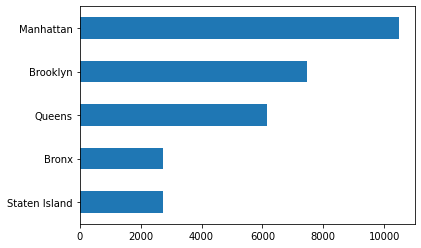

In [247]:
df['borough'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [249]:
df_pop = pd.read_csv("boro_population.csv")

In [348]:
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [349]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,98,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,91,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,70,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,70,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,98,Upper West Side,10024,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,77,Jamaica,11436,Queens,2339150,109
29569,11436,ROXY,F,NaN,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,126,Jamaica,11436,Queens,2339150,109
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,84,Jamaica,11436,Queens,2339150,109
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,119,Jamaica,11436,Queens,2339150,109


In [253]:
df = df.merge(df_pop,left_on='borough',right_on='borough')

In [293]:
dcp = pd.DataFrame(df.borough.value_counts())

In [350]:
dcp

,borough
Manhattan,10478
Brooklyn,7466
Queens,6154
Bronx,2748
Staten Island,2727


In [296]:
df['borough'].value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [363]:
dcp = dcp.rename(columns={'borough': 'num_dogs'})

In [374]:
dcp = dcp.merge(df_pop, left_index=True, right_on='borough')

In [381]:
dcp

,num_dogs,borough,population,area_sqmi
0,10478,Manhattan,1644518,23
2,7466,Brooklyn,2636735,71
3,6154,Queens,2339150,109
1,2748,Bronx,1455444,42
4,2727,Staten Island,474558,59


In [380]:
# Manhattan has the highest number dogs per capita
dcp.num_dogs / dcp.population * 100

0    0.637147
2    0.283153
3    0.263087
1    0.188808
4    0.574640
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [329]:
pd.set_option("display.max_columns", None)

In [343]:
groups = df.groupby(by='borough')['Primary Breed']

In [342]:
df.groupby(by='borough')['Primary Breed'].value_counts(ascending=False)

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
                                                    ... 
Staten Island  Tibetan Spaniel                         1
               Treeing Tennessee Brindle               1
               Welsh Corgi, Cardigan                   1
               West Highland White Terrier             1
               Whippet                                 1
Name: Primary Breed, Length: 899, dtype: int64

In [347]:
for borough, breed in groups:
    print(borough)
    print(breed.value_counts().head())

Bronx
Yorkshire Terrier                     250
Shih Tzu                              244
Chihuahua                             208
American Pit Bull Terrier/Pit Bull    181
Maltese                               139
Name: Primary Breed, dtype: int64
Brooklyn
Yorkshire Terrier     501
Shih Tzu              481
Chihuahua             391
Labrador Retriever    255
Maltese               247
Name: Primary Breed, dtype: int64
Manhattan
Chihuahua             511
Yorkshire Terrier     505
Shih Tzu              454
Labrador Retriever    422
Maltese               332
Name: Primary Breed, dtype: int64
Queens
Yorkshire Terrier     434
Shih Tzu              395
Chihuahua             306
Maltese               305
Labrador Retriever    208
Name: Primary Breed, dtype: int64
Staten Island
Yorkshire Terrier     171
Shih Tzu              165
Labrador Retriever    123
Chihuahua             100
Maltese                93
Name: Primary Breed, dtype: int64


## What percentage of dogs are not guard dogs?

In [183]:
df['Guard or Trained'].value_counts() / 30000 * 100

No     98.523333
Yes     0.053333
Name: Guard or Trained, dtype: float64